# Wrapping up

#### EXERCISE:
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation.
In this exercise, you'll begin by creating a histogram of the <code>life_expectancy</code> column.
You should not get any values under 0 and you should see something reasonable on the higher end of the <code>life_expectancy</code> age range.

Your next task is to investigate how average life expectancy changed over the years.
To do this, you need to subset the data by each year, get the <code>life_expectancy</code> column from each subset, and take an average of the values.
You can achieve this using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html" target="_blank"><code>.groupby()</code> method</a>. This
<code>.groupby()</code> method is covered in greater depth in <a href="https://www.datacamp.com/courses/manipulating-dataframes-with-pandas" target="_blank">Manipulating DataFrames with pandas</a>.

Finally, you can save your tidy and summarized DataFrame to a file using the <code>.to_csv()</code> method.

matplotlib.pyplot and pandas have been pre-imported as <code>plt</code> and <code>pd</code>. Go for it!

#### INSTRUCTIONS:
* Create a histogram of the <code>life_expectancy</code> column using the <code>.plot()</code> method of <code>gapminder</code>. Specify <code>kind='hist'</code>.
* Group <code>gapminder</code> by <code>'year'</code> and aggregate <code>'life_expectancy'</code> by the mean. To do this:
 * Use the <code>.groupby()</code> method on <code>gapminder</code> with <code>'year'</code> as the argument. Then select <code>'life_expectancy'</code> and chain the <code>.mean()</code> method to it.
* Print the head and tail of <code>gapminder_agg</code>. This has been done for you.
* Create a line plot of average life expectancy per year by using the <code>.plot()</code> method (without any arguments in plot) on <code>gapminder_agg</code>.
* Save <code>gapminder</code> and <code>gapminder_agg</code> to csv files called <code>'gapminder.csv'</code> and <code>'gapminder_agg.csv'</code>, respectively, using the <code>.to_csv()</code> method.

#### SCRIPT.PY:

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


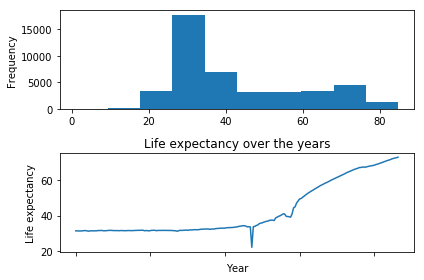

In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
gapminder = pd.melt(pd.concat([pd.read_csv("g1800.csv"), pd.read_csv("g1900.csv"), pd.read_csv("g2000.csv")], sort=False), id_vars="Life expectancy")
gapminder.columns = ["country", "year", "life_expectancy"]
gapminder = gapminder.dropna()
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind="hist")

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv("gapminder.csv")
gapminder_agg.to_csv("gapminder_agg.csv")